In [92]:
# on removed cols data I will be performing undersampling now
file_path_relative = r"..\data\processed\importantcolumns.csv"

In [93]:
import pandas as pd

In [94]:
import os
print(os.getcwd())

d:\DATASCIENCE\creditcardfraud\credit_card_fraud_detection\notebooks


In [95]:
df=pd.read_csv(file_path_relative)

In [96]:
df.duplicated().sum()

19

In [97]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


### SO above is the data after removing all the duplicates of non-fraud and non-interlinked columns


df.columns

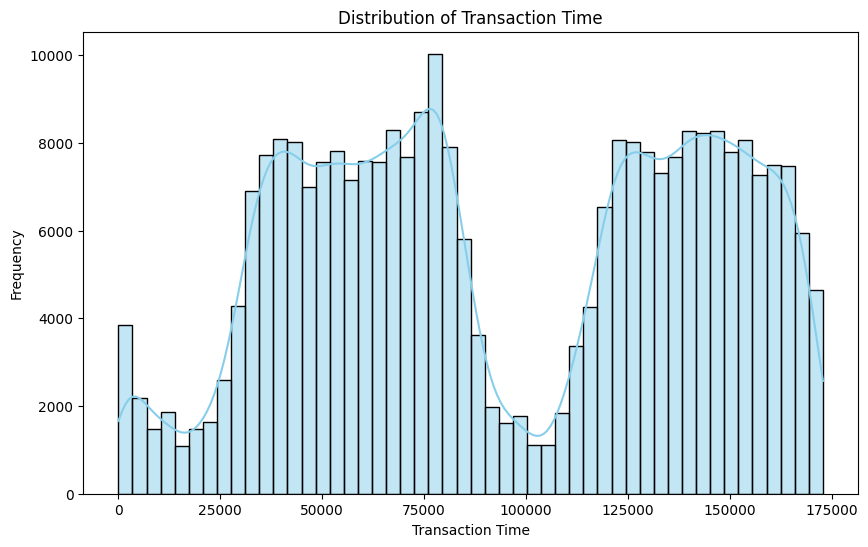

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))

sns.histplot(df['Time'], bins=50, kde=True, color='skyblue')

plt.title('Distribution of Transaction Time')
plt.xlabel('Transaction Time')
plt.ylabel('Frequency')
plt.show()


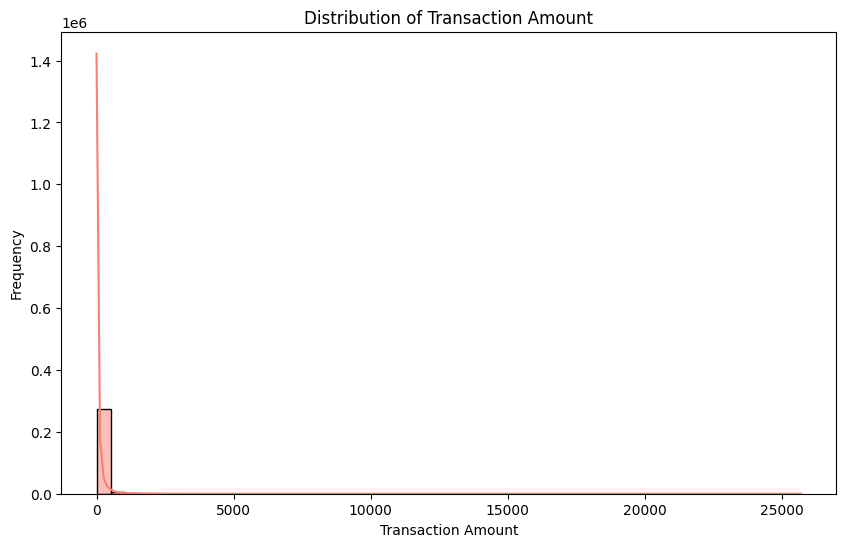

In [99]:

plt.figure(figsize=(10, 6))


sns.histplot(df['Amount'], bins=50, kde=True, color='salmon')

plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283745.0,94810.629752,47479.710012,0.000000,54208.000000,84695.000000,139297.000000,172792.000000
V1,283745.0,0.005141,1.951316,-56.407510,-0.916191,0.020241,1.316034,2.454930
V2,283745.0,-0.003529,1.648781,-72.715728,-0.600272,0.063994,0.800414,22.057729
V3,283745.0,0.000636,1.514705,-48.325589,-0.889801,0.179928,1.026882,9.382558
V4,283745.0,-0.002546,1.415196,-5.683171,-0.850082,-0.022112,0.739927,16.875344
V5,283745.0,0.001293,1.379224,-113.743307,-0.690003,-0.053571,0.612182,34.801666
V6,283745.0,-0.001175,1.332279,-26.160506,-0.769102,-0.275211,0.396794,73.301626
V7,283745.0,0.000773,1.236046,-43.557242,-0.552676,0.040783,0.570453,120.589494
V8,283745.0,-0.001454,1.190455,-73.216718,-0.208838,0.021903,0.325737,20.007208
V9,283745.0,-0.001867,1.096214,-13.434066,-0.644310,-0.052596,0.595876,15.594995


In [101]:
sorted_amounts = df[df['Class'] == 1][['Amount']].sort_values(by='Amount', ascending=False)
print(sorted_amounts)

         Amount
175402  2125.87
6932    1809.68
248269  1504.93
88869   1402.16
81304   1389.56
...         ...
142800     0.00
69714      0.00
247400     0.00
93461      0.00
534        0.00

[492 rows x 1 columns]


In [102]:
def draw_boxplot(column_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column_name], color='skyblue')
    plt.title(f'Boxplot of{column_name}')
    plt.xlabel(f'{column_name}')
    plt.show()

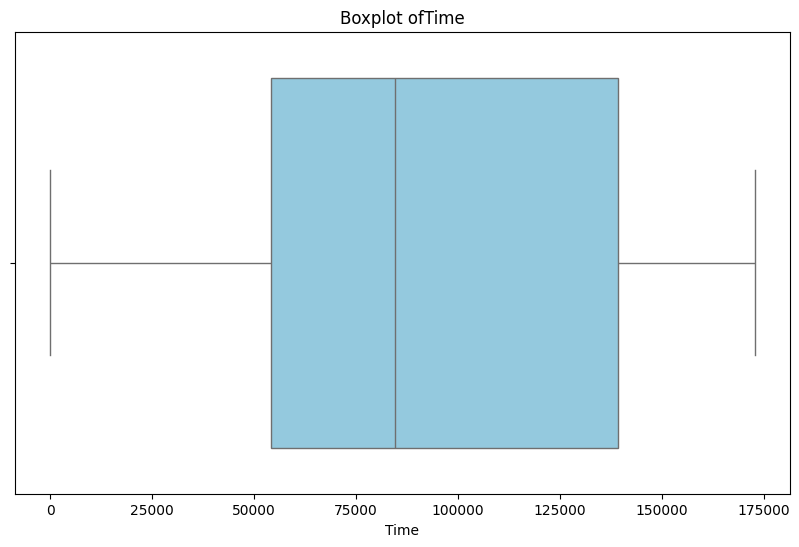

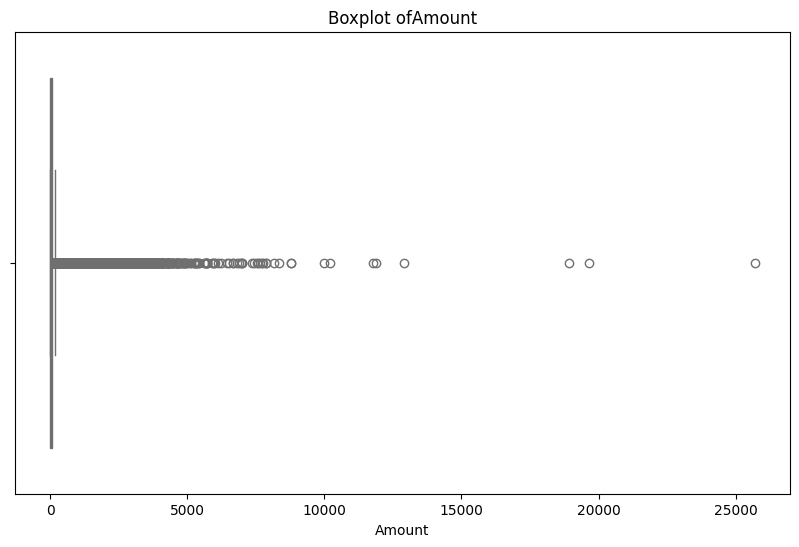

In [103]:
draw_boxplot('Time')
draw_boxplot('Amount')

#### Time
Distribution Observation:
The data appears fairly spread out and not heavily skewed.
Since no outliers are visible, the distribution is more continuous and uniform.

### AMount
The box (IQR) is very small compared to the range, meaning most transaction amounts are concentrated at lower values.
There are many outliers (small circles) spread far to the right.
The median is very close to the bottom of the box, meaning most transactions are small.
Distribution Observation:
The data is highly right-skewed.
Most transactions are small, but some extreme high-value transactions exist (long right tail).
This suggests a power law or exponential distribution—a small number of high-value transactions drive the overall sum.

In [105]:
from scipy import stats
import numpy as np

# based on data upper bound 5000 looks good to me
lower_bound = df['Amount'].quantile(0.01)
upper_bound = 5000
df['Amount'] = np.clip(df['Amount'], lower_bound, upper_bound)


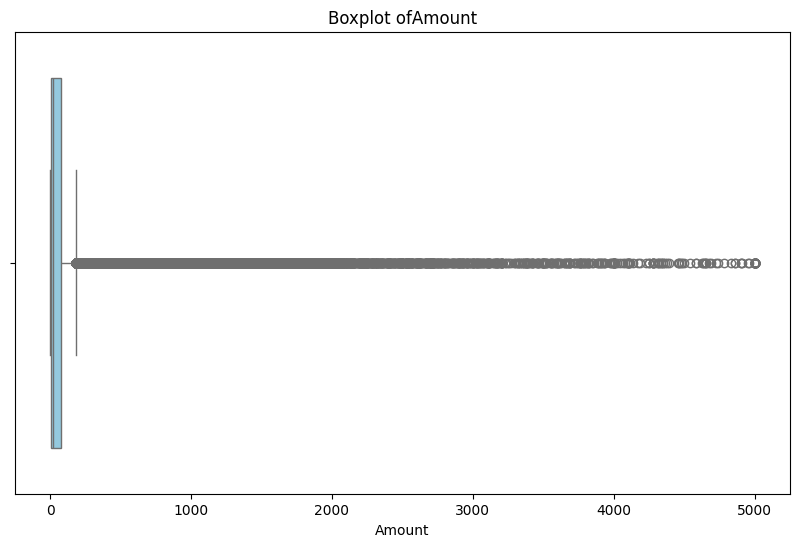

In [106]:
draw_boxplot('Amount')

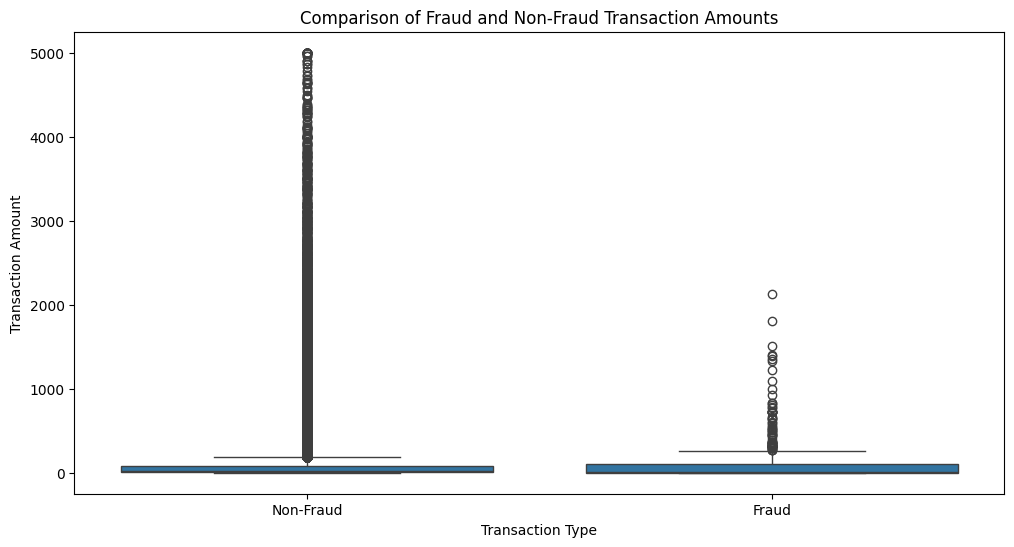

In [107]:
plt.figure(figsize=(12, 6))

# Create two boxplots side by side
sns.boxplot(x=df["Class"], y=df["Amount"], showfliers=True)  # showfliers=True shows all outliers
plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.title("Comparison of Fraud and Non-Fraud Transaction Amounts")

plt.show()


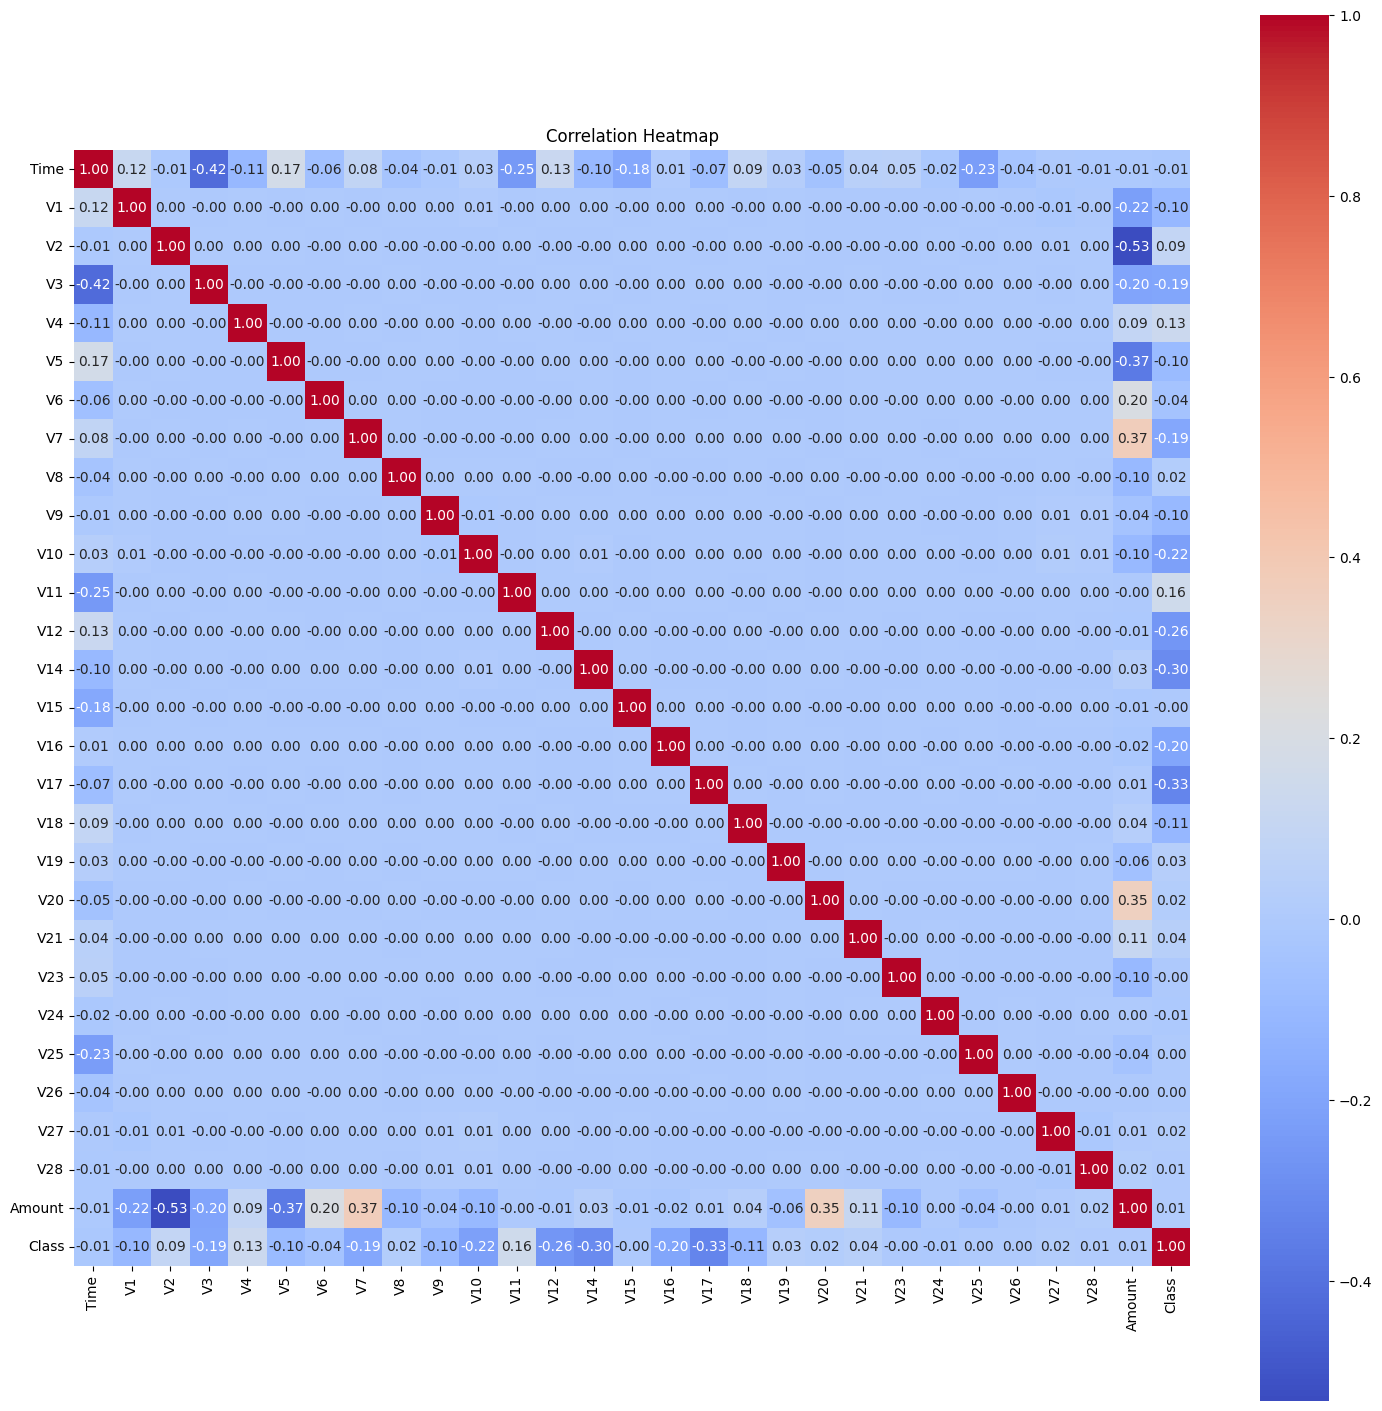

In [108]:
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

In [113]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [114]:

df = df.sample(frac=1, random_state=42)

fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0].iloc[:len(fraud_df)]  
balanced_df = pd.concat([fraud_df, non_fraud_df])


final_df = balanced_df.sample(frac=1, random_state=42)


final_df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
102792,-1.356302,-1.787720,2.006040,-1.785952,-0.229794,-1.221139,-1.683020,-0.078750,-1.281997,1.120295,...,-0.201689,-0.317180,0.465652,-0.897000,-0.477561,0.256539,0.147546,0,0.006813,-0.189942
82093,-7.626924,-6.976420,-2.077911,3.416754,4.458758,-5.080408,-6.578948,1.760341,-0.599509,-4.001742,...,1.224795,-0.330811,-0.078946,0.270306,0.431119,0.821381,-1.056088,1,-0.041991,-0.297453
135402,1.200679,0.085383,0.591456,0.949396,-0.345754,-0.140122,-0.250635,-0.006139,0.386458,-0.058634,...,-0.094548,-0.072607,-0.483853,0.424385,-0.462995,0.043237,0.033949,0,0.172692,-0.038101
106651,-1.512516,1.133139,-1.601052,2.813401,-2.664503,-0.310371,-1.520895,0.852996,-1.496495,-4.056293,...,0.729828,0.567005,0.323586,0.040871,0.825814,0.414482,0.267265,1,4.117214,-0.169528
15453,-21.885434,12.930505,-24.098872,6.203314,-16.466099,-4.459842,-16.519836,14.535565,-3.897022,-8.650758,...,1.762232,-0.951043,0.134565,1.507110,-0.222671,1.527655,0.453699,1,1.084399,-0.679242


In [115]:
final_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

- > We did the following till now
- removed uncessary columns
- uncesseary values
- stadnardized time and amount as they were not pcaed
- removed outliers (some)

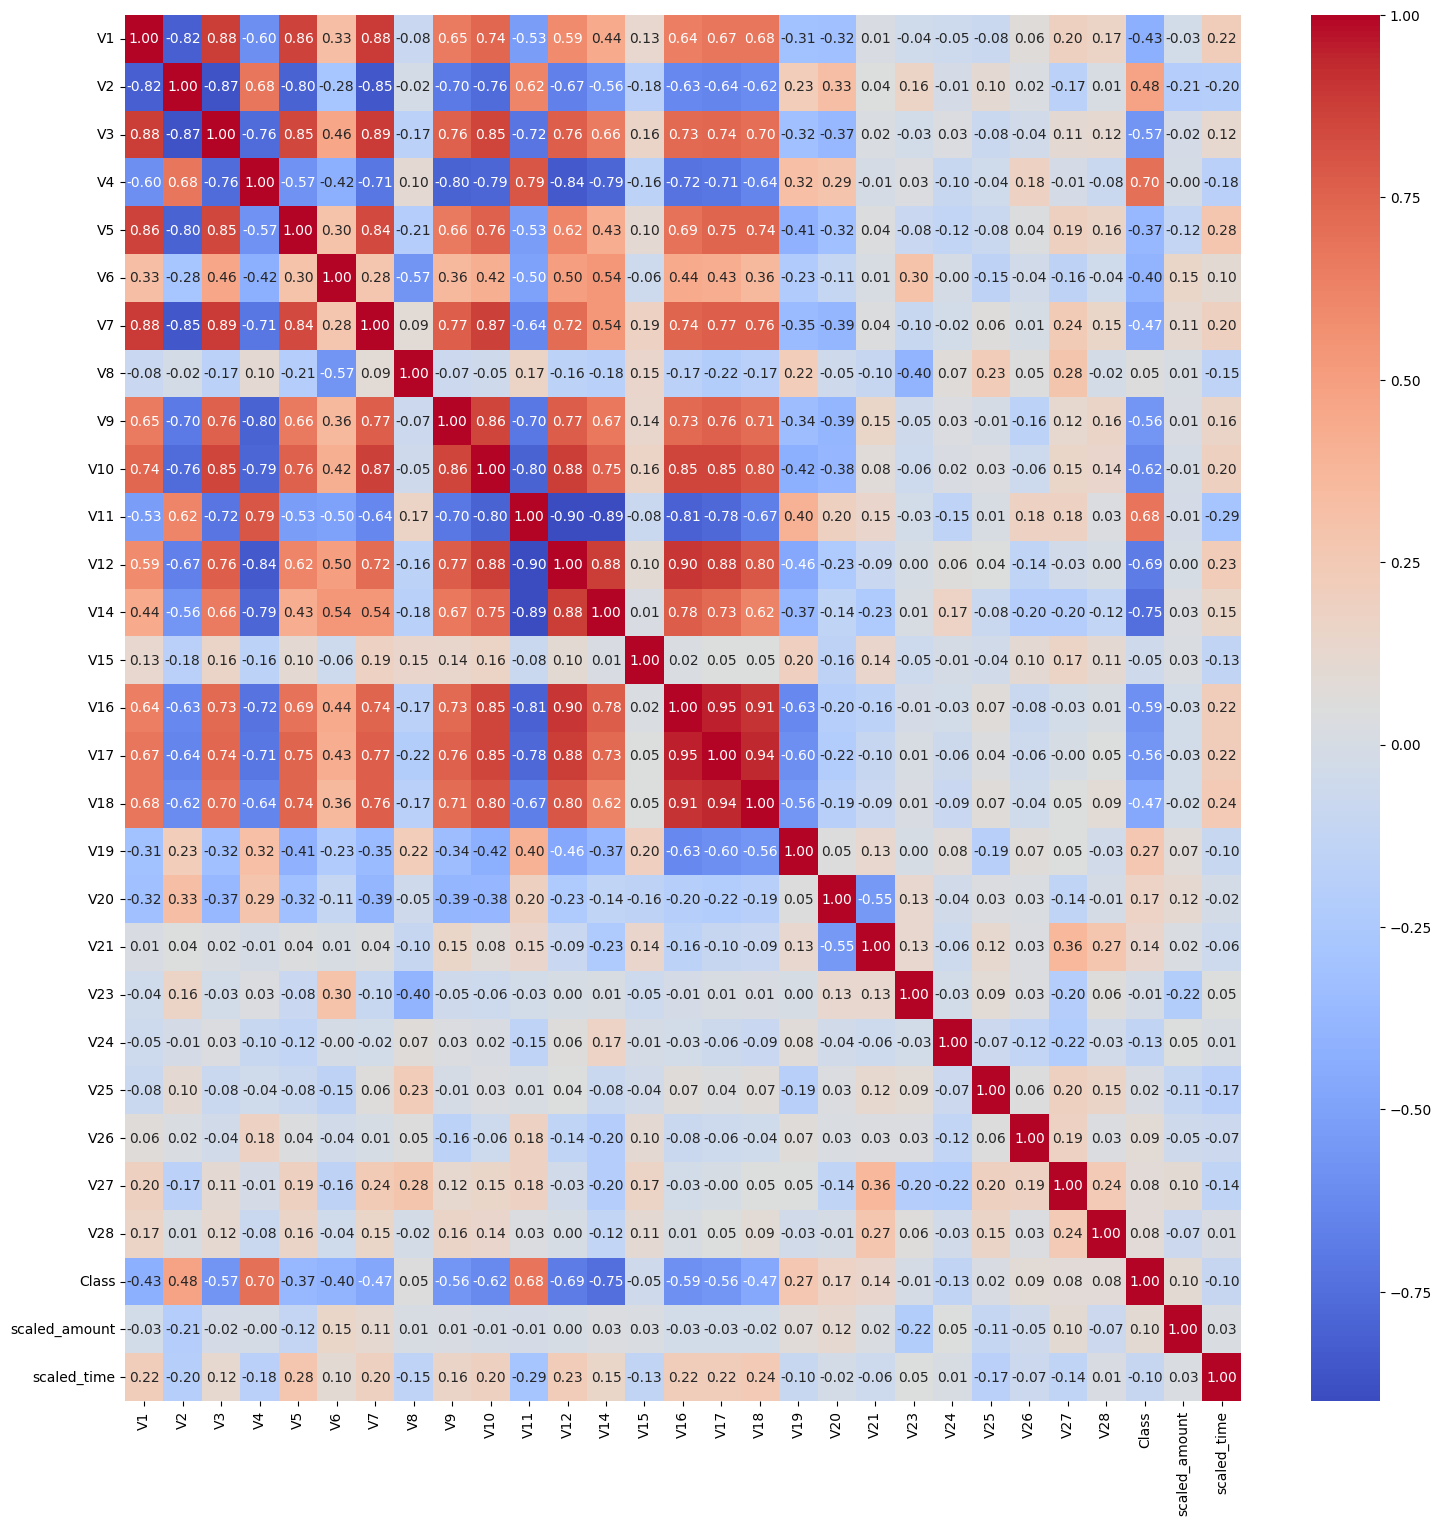

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = final_df.corr()
plt.figure(figsize=(18, 18)) 
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = final_df.drop(columns=['Class']) 
y = final_df['Class']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

log_reg = LogisticRegression(max_iter=2000)  
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy:  0.949238578680203
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        99
           1       0.98      0.92      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [128]:
from sklearn.inspection import partial_dependence

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [125]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

In [126]:
param_grid = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'Decision Tree': {'max_depth': [3, 5, 10, None]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': [3, 5, 7, 10]}
}

Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1}
Training Decision Tree...
Best parameters for Decision Tree: {'max_depth': 3}
Training Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Training SVM...
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Training KNN...
Best parameters for KNN: {'n_neighbors': 7}

Logistic Regression Results:
Accuracy: 0.949238578680203
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        99
           1       0.99      0.91      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197


Decision Tree Results:
Accuracy: 0.9289340101522843
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1   

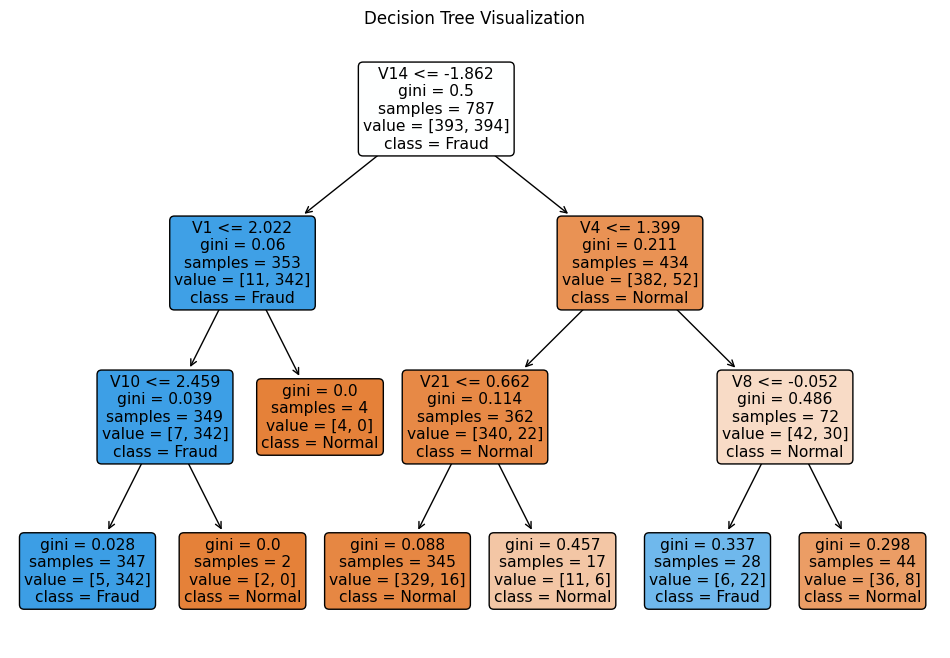

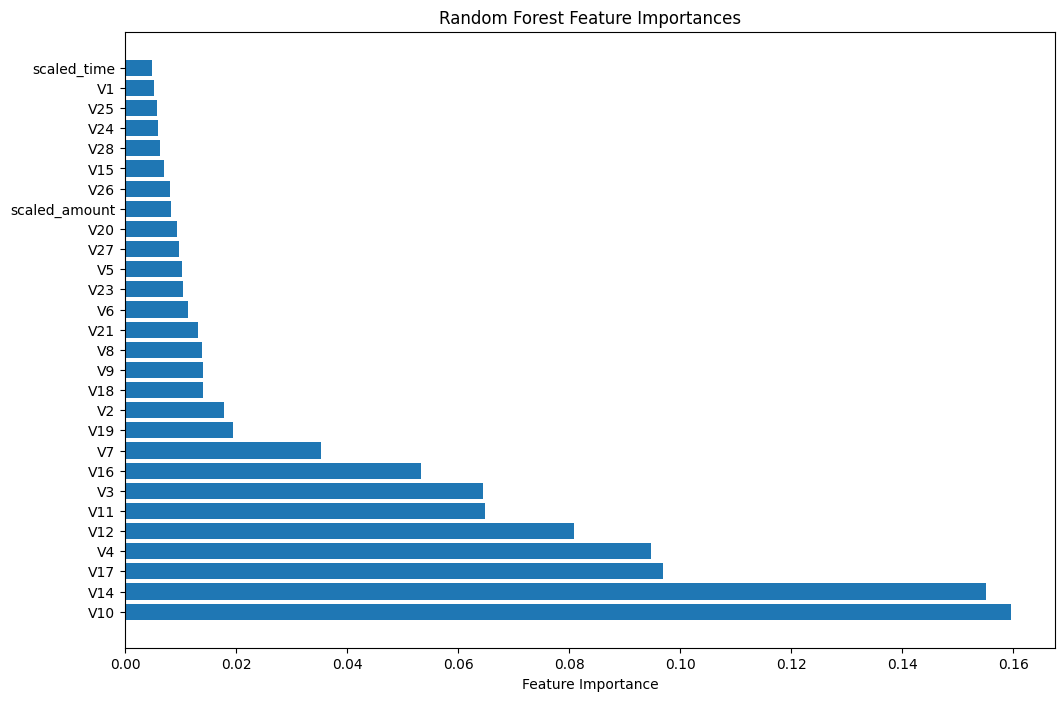

In [129]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

param_grid = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'Decision Tree': {'max_depth': [3, 5, 10, None]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': [3, 5, 7, 10]}
}


best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)  # No scaling, using original data
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")


for model_name, model in best_models.items():
    y_pred = model.predict(X_test)  # No scaling for prediction
    print(f"\n{model_name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


dt_model = best_models['Decision Tree']
plt.figure(figsize=(12,8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Normal', 'Fraud'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Random Forest
rf_model = best_models['Random Forest']
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12,8))
plt.title("Random Forest Feature Importances")
plt.barh(X.columns[indices], importances[indices], align="center")
plt.xlabel("Feature Importance")
plt.show()

# Step 6: Partial Dependence Plots for Decision Tree and Random Forest (Feature vs. Target)
# Show which features are most dependent on the target class

# # For Decision Tree


In [131]:
partial_dependence(dt_model, X_train, features=[0, 1, 2], 
                        feature_names=X.columns, grid_resolution=50)
plt.suptitle("Partial Dependence for Decision Tree")
plt.show()

# For Random Forest
partial_dependence(rf_model, X_train, features=[0, 1, 2], 
                        feature_names=X.columns, grid_resolution=50)
plt.suptitle("Partial Dependence for Random Forest")
plt.show()

##### APPROACH -2
- Here, I will try removing the outliers